#### VARIABILE ALEATORIA BERNULLIANA
E' una distribuzione di probabilità su soli due valori chiamati ```0``` e ```1```  .  
Una distribuzione Bernulliana è parametrizzata rispetto ad un parametro ```p```  .  
```p``` indica la probabilità di successo, ovvero se ```X ~ B(p)``` allora ```P(X=1) = p```  .  
Dove con la notazione ```X ~ B(p)``` diciamo che ```X``` è estratto da una distribuzione Bernulliana di parametro ```p```  .   
Spesso, la bernulliana è associata al lancio di una moneta potenzialemente truccata, dove ```P(X=testa)=p```.

In [70]:
# questa funzione ci ritornerà delle variabili aleatorie        ###
# estratte secondo la distribuzione di bernulli con parametro p ###
get_bernulli_random_variable = function(p=0.5) {
    random_variable = function() {
        return(if(runif(1)<p) 1 else 0)
    }
    return(random_variable)
}
               
# costruiamo una variabile aleatoria corrispondente a una moneta "fair" ###
f0 = get_bernulli_random_variable(0.5)

# facciamo un po' di test ###
for( i in 1:10) {
    cat(f0(), end=" ")
}

0  1  1  0  1  0  0  0  1  1  

Se facciamo abbastanza esperimenti dovremmo notare che la distribuzione dei nostri lanci converge a quella teorica  .  
Questo vuol dire che anche varianza e media degli esperimenti convergeranno al valore atteso e alla varianza della distribuzione teorica.

In [2]:
# verifichiamo che il valore atteso di una bernulliana di parametro p è proprio p ###
# e che la varianza è p(1-p)                                                      ###

p = 0.75
theoretical_mean = p
theoretical_variance = p*(1-p)

f0 = get_bernulli_random_variable(p=0.75)
# facciamo un po' di test ###
tests = c()
for (i in 1:10^2) {tests = c(tests, f0())}

cat("the computed mean is       :",mean(tests),"\n")
cat("the theoretical mean is    :",theoretical_mean,"\n")
cat("the computed variance is   :",var(tests),"\n")
cat("the theoretical variance is:",theoretical_variance,"\n")

the computed mean is       : 0.78 
the theoretical mean is    : 0.75 
the computed variance is   : 0.1733333 
the theoretical variance is: 0.1875 


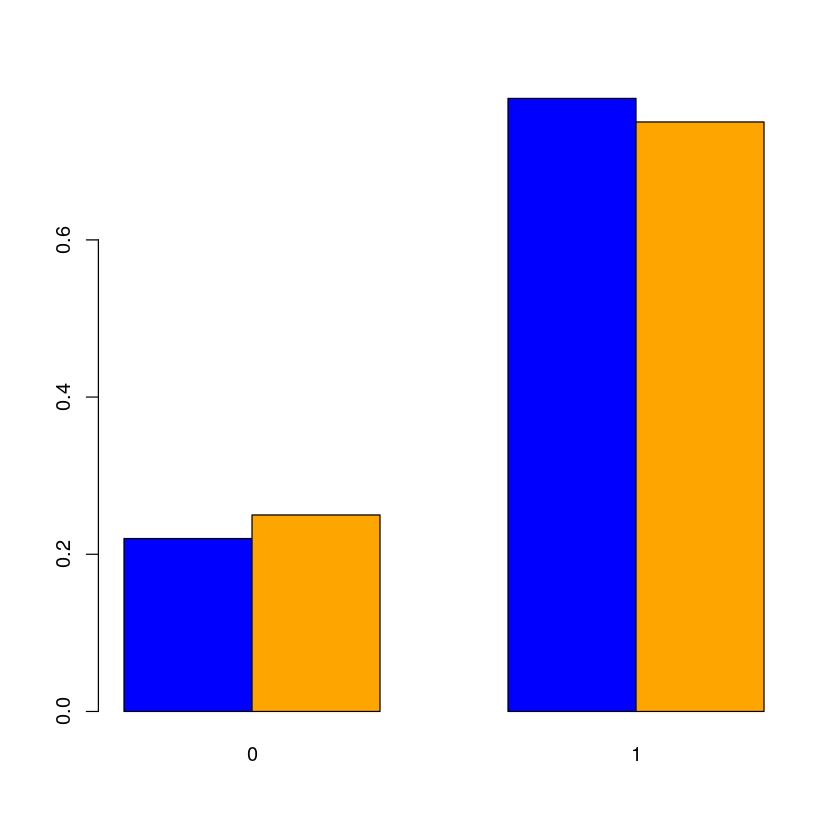

In [3]:
### plottiamo anche un istogramma ###
barplot(rbind(prop.table(table(tests)),c(1-p,p)),beside=T,col=c("blue","orange"))

### VARIABILE ALEATORIA BINOMIALE
E' la variabile aleatoria che descrive il numero di successi di un processo di Bernulli. 

<a href="https://www.codecogs.com/eqnedit.php?latex=S&space;=&space;X_1&space;&plus;&space;X_2&space;&plus;&space;\dots&space;&plus;&space;X_n&space;\text{&space;where&space;}&space;X_i&space;\sim&space;\mathcal{B}(p))" target="_blank"><img src="https://latex.codecogs.com/gif.latex?S&space;=&space;X_1&space;&plus;&space;X_2&space;&plus;&space;\dots&space;&plus;&space;X_n&space;\text{&space;where&space;}&space;X_i&space;\sim&space;\mathcal{B}(p))" title="S = X_1 + X_2 + \dots + X_n \text{ where } X_i \sim \mathcal{B}(p))" /></a>

Di conseguenza, possiamo costruire la nostra variabile aleatoria Binomiale sfruttando le Bernulliane che abbiamo costruito in precedenza.  
Diremo:

<a href="https://www.codecogs.com/eqnedit.php?latex=X&space;\sim&space;\mathcal{B}(n,p))" target="_blank"><img src="https://latex.codecogs.com/gif.latex?X&space;\sim&space;\mathcal{B}(n,p))" title="X \sim \mathcal{B}(n,p))" /></a>

Per denotare che X è estratta da una variabile aleatoria Binomiale caratterizzata da i parametri n e p.

In [4]:
# la distribuzione binomiale B(n,p) somma n variabili aleatorie indipendenti ###
get_binomial_random_variable = function(n=5,p=0.5) {
    # costruiamo n bernulliane di parametro p
    rvs = c()
    for (i in 1:n) {rvs = c(rvs,get_bernulli_random_variable(p))}
    random_variable = function() {
        sum = 0
        for (i in 1:n) {
            sum = sum + rvs[[i]]()
        }
        return(sum)
    }
    return(random_variable)
}

f0 = get_binomial_random_variable(n=5,p=0.5)

# facciamo un po' di test ###
for (i in 1:10) {
    cat(f0(), " ")
}

2  2  0  2  2  3  3  3  2  3  

Ancora una volta possiamo verificare che con l'aumentare del numero di tentativi la distribuzione ottenuta converge a quella teorica.

In [5]:
# verifichiamo che il valore atteso di una binomiale di parametro n,p è n*p ###
# e che la varianza è n*p*(1-p)                                             ###

p = 0.25
n = 10
theoretical_mean = n*p
theoretical_variance = n*p*(1-p)

f0 = get_binomial_random_variable(n=n,p=p)

# facciamo un milione di test ###
tests = c()
for (i in 1:10^3) {
    tests = c(tests, f0())
}
     
cat("the computed mean is       :",mean(tests),"\n")
cat("the theoretical mean is    :",theoretical_mean,"\n")
cat("the computed variance is   :",var(tests),"\n")
cat("the theoretical variance is:",theoretical_variance,"\n")

the computed mean is       : 2.493 
the theoretical mean is    : 2.5 
the computed variance is   : 1.815767 
the theoretical variance is: 1.875 


In [6]:
# costruiamo la distribuzione binomiale teorica ###

# ci serve la funzione fattoriale ###
factorial = function(n){
    stopifnot(n >= 0)
    return(if (n < 2 ) 1 else n*factorial(n-1))
}
           
# usando il fattoriale possiamo calcolare il coefficiente binomiale ###
binomial_coeff = function(n,k){
    stopifnot(n >= k && n >= 0 && k >= 0)
    return(floor(factorial(n)/(factorial(k)*factorial(n-k))))
}
           
# usando il coefficiente binomiale possiamo calcolare la distribuzione binomiale ###
binomial_dist = function(n,p){
    stopifnot(p >= 0 && p <= 1 && n >= 0)
    res = c()
    for (i in 0:n) {
        res = c(res, binomial_coeff(n,i)*(p^i)*(1-p)^(n-i))
    }
    return(res)
}

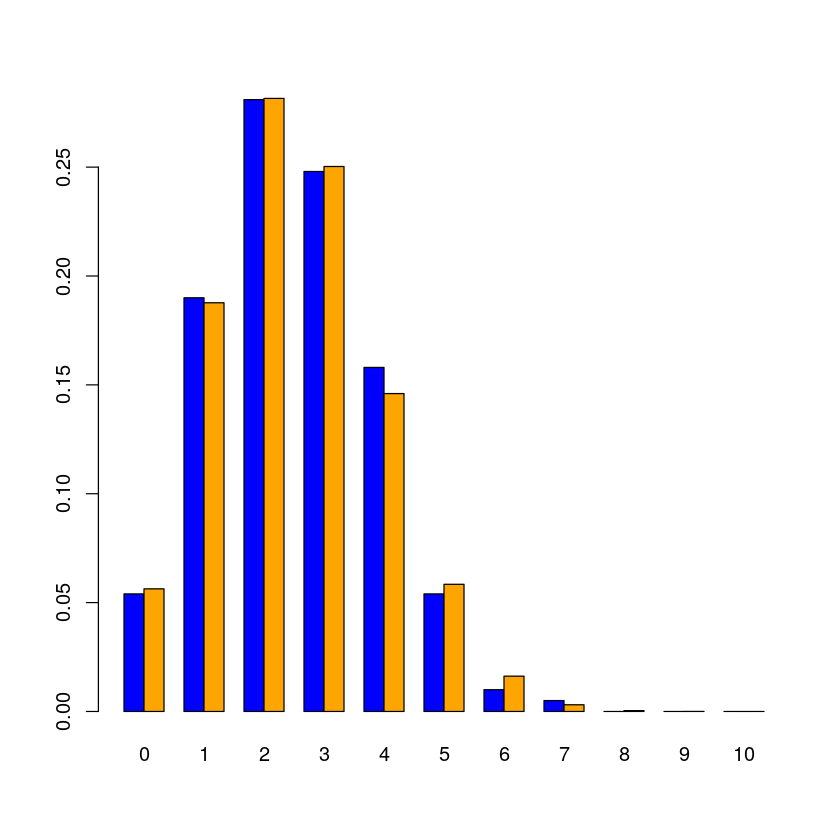

In [7]:
# ancora una volta, facciamo il plot dell'istogramma ###

freqs = rep(0,n+1)
for (t in tests) { freqs[t+1] = freqs[t+1] + 1 }
freqs = setNames(freqs/length(tests),0:n)

barplot(rbind(freqs,binomial_dist(n,p)), beside=T, col=c("blue","orange"))

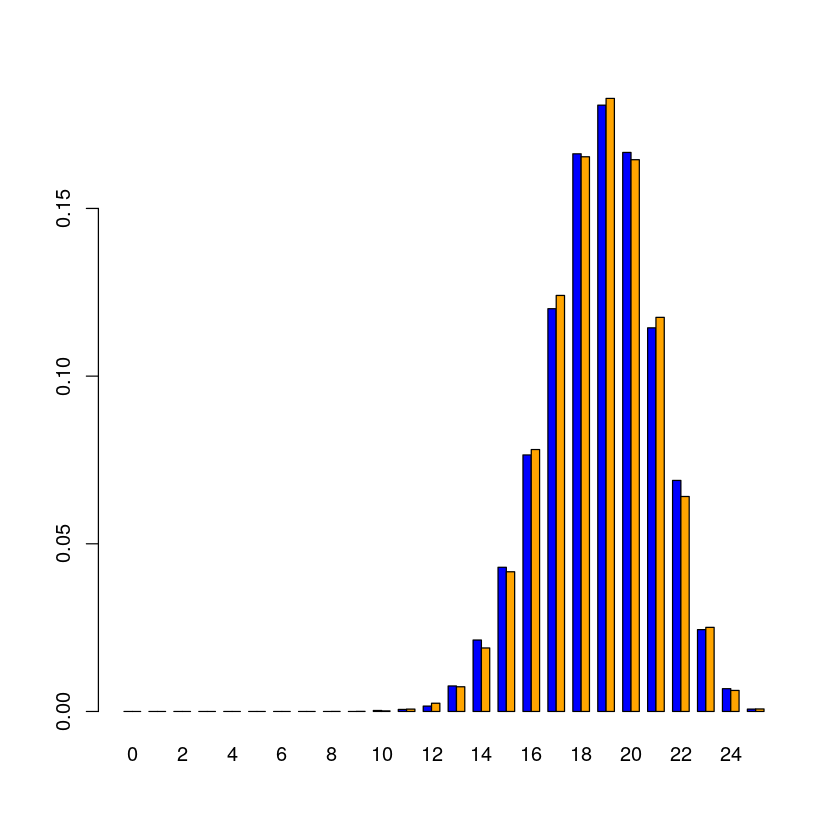

In [20]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###

plot_binomial = function(n=5,p=0.5,steps=10**5) {
    rv = get_binomial_random_variable(n=n,p=p)

    tests = c()
    for (i in 1:steps) { tests = c(tests, rv()) }

    freqs = rep(0,n+1)
    for (t in tests) { freqs[t+1] = freqs[t+1] + 1 }
    freqs = setNames(freqs/length(tests),0:n)
    
    barplot(rbind(freqs,binomial_dist(n,p)), beside=T, col=c("blue","orange"))
}
             
plot_binomial(n=25,p=0.75,steps=10000)

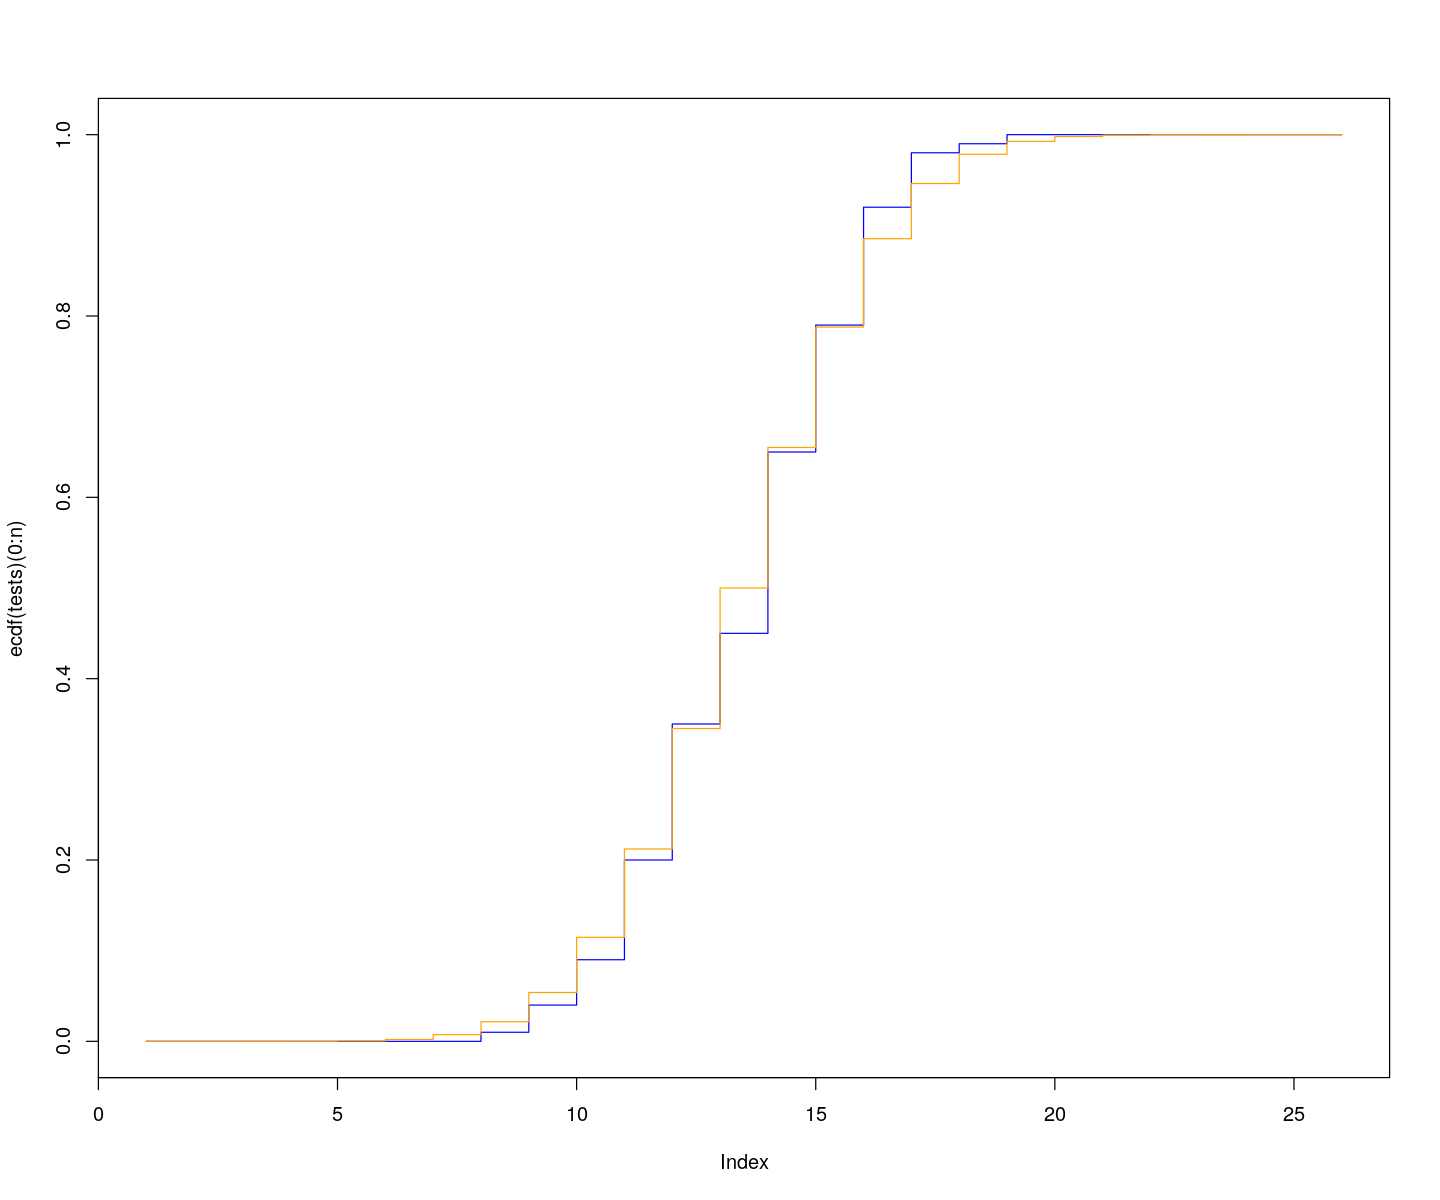

In [69]:
# possiamo giocare un po' con la binomiale                    ###
# creaiamo una funzione che plotti una simulazione dati n e p ###
# e la compari con la controparte teorica                     ###
# questa volta con la cumulata                                ###

plot_binomial = function(n=5,p=0.5,steps=10**5) {
    rv = get_binomial_random_variable(n=n,p=p)

    tests = c()
    for (i in 1:steps) { tests = c(tests, rv()) }

    #plot( ecdf(tests), verticals=TRUE, do.points=FALSE, col="blue")
    plot( ecdf(tests)(0:n), type='s', col='blue')
    lines( cumsum(binomial_dist(n,p)), type='s', col='orange')
}
    
plot_binomial(n=25,p=0.5,steps=100)

In ultimo vediamo cosa succede al qqplot di una binomiale rispetto ad una normale.  
Nella seguente simulazione vengono fatte 10000 campionamenti dalla nostra binomiale prima con ```n=10``` poi ```n=25``` a seguire ```n=50``` e infine ```n=100```  .  
cosa accadra per n che tende a infinito?

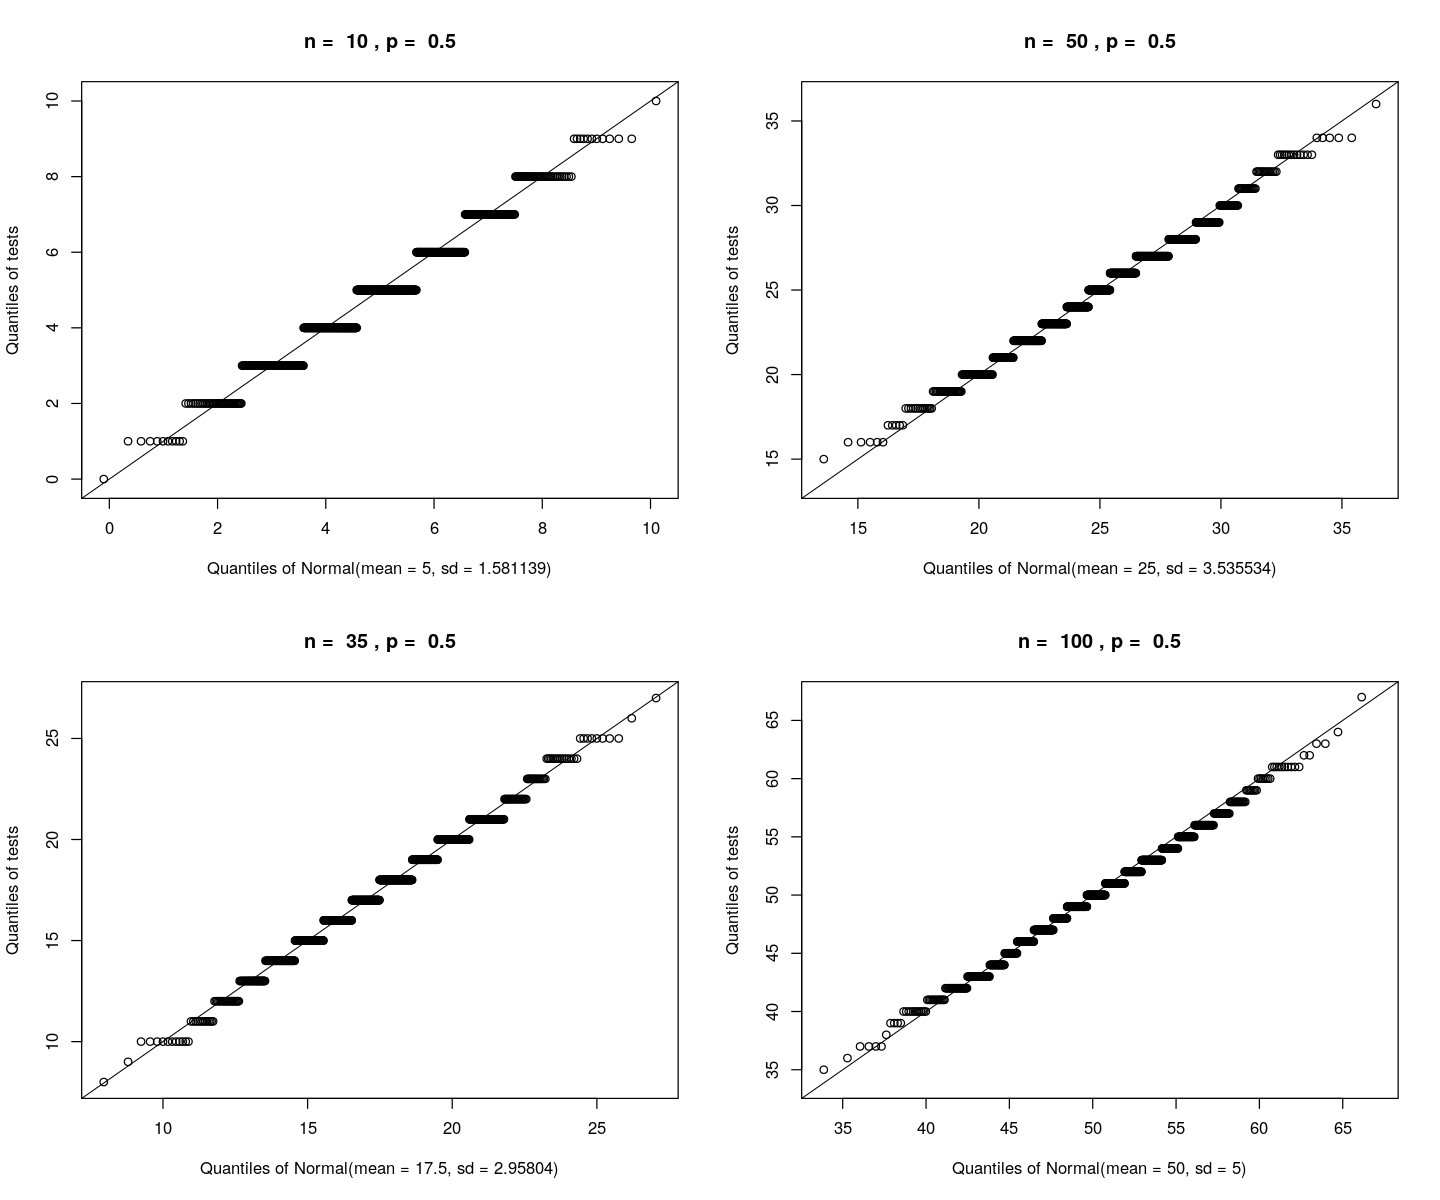

In [68]:
# esiste un metodo che campiona dalla binomiale ###

library(EnvStats) # usiamo qqPlot invece di qqplot in quanto permette di specificare i parametri della distribuzione
library(repr)
layout(matrix(1:4,2,2))
options(repr.plot.width = 12, repr.plot.height = 10)

plot_qq = function(n=5,p=0.5,steps=10^3) {

    tests = rbinom(size=n, prob=p, n=steps)
    
    qqPlot(tests, distribution="norm",main=paste("n = ",toString(n),", p = ",toString(p)), param.list=list(mean=n*p, sd=(n*p*(1-p))^0.5), add.line=T, qq.line.type="0-1")
}
plot_qq(n=10,p=0.5,steps=10^3)
plot_qq(n=35,p=0.5,steps=10^3)
plot_qq(n=50,p=0.5,steps=10^3)
plot_qq(n=100,p=0.5,steps=10^3)